In [24]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import auxiliary_functions

In [25]:
net = ContTempNetwork.load('periodic_SBM_net')

In [26]:
selected_lamdas = np.logspace(-3,1,10)
windows = [10, 100, 1000]
list_scales = [3, 2, 1, 2, 3, 2, 1, 2, 3]

In [27]:
# Define the time intervals for the x-axis
time_intervals = [(0, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600), (600, 700), (700,800), (800,900)]

matrix1 = net.compute_static_adjacency_matrix(start_time=0, end_time=100).toarray()
matrix2 = net.compute_static_adjacency_matrix(start_time=100, end_time=200).toarray()
matrix3 = net.compute_static_adjacency_matrix(start_time=200, end_time=300).toarray()
matrix4 = net.compute_static_adjacency_matrix(start_time=300, end_time=400).toarray()
matrix5 = net.compute_static_adjacency_matrix(start_time=400, end_time=500).toarray()
matrix6 = net.compute_static_adjacency_matrix(start_time=500, end_time=600).toarray()
matrix7 = net.compute_static_adjacency_matrix(start_time=600, end_time=700).toarray()
matrix8 = net.compute_static_adjacency_matrix(start_time=700, end_time=800).toarray()
matrix9 = net.compute_static_adjacency_matrix(start_time=800, end_time=900).toarray()

In [28]:
dict_colors = {1:'red', 2:'blue', 3:'green'}

/tmp/ipykernel_1458617/1281012657.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


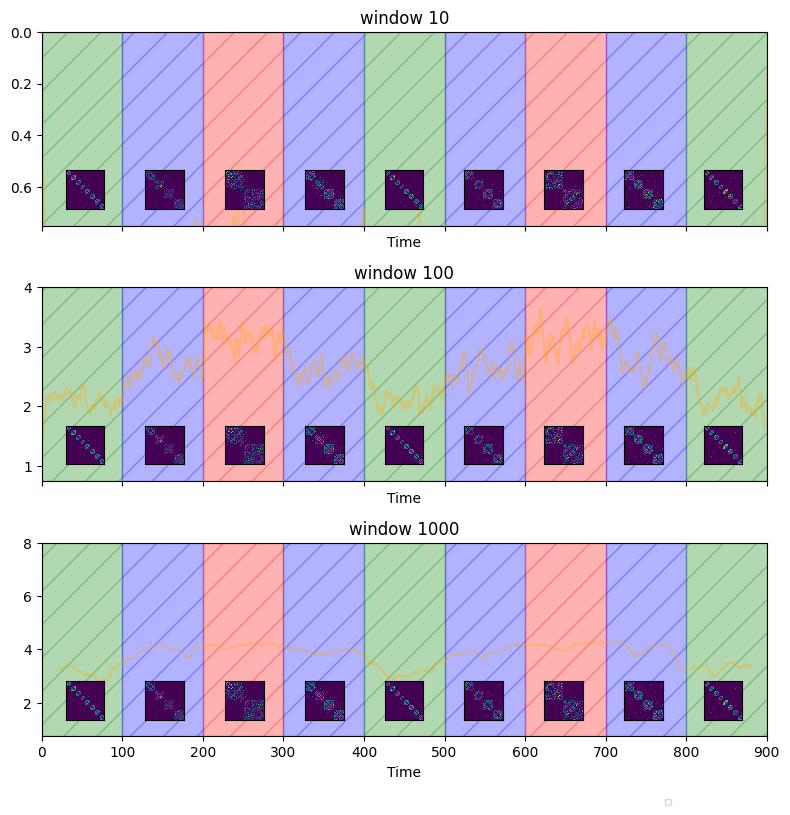

In [29]:
#Plot 5
indices_plot = [0,1,2]
lamdas = selected_lamdas[8:9]
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

fig, ax = plt.subplots(3,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows):
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

        for i, lamda in enumerate(lamdas):
            S = window_S_selected[i]
            ax[indices_plot[j]].plot(net.times[(window // 2)+1 : - (window // 2)], S[1:], color = list_colors[i], alpha = 0.30)
            ax[indices_plot[j]].set_xlabel('Time')
            ax[indices_plot[j]].set_ylim(0.75, 4*j)
            ax[indices_plot[j]].set_title(f'window {window }')

        # Add inset plots for the matrices inside Plot A
        matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
        positions = [-0.05, 0.06, 0.17, 0.28, 0.39, 0.50, 0.61, 0.72, 0.83]  # Horizontal positions for the insets
        for i, (matrix, pos) in enumerate(zip(matrices, positions)):
            inset_ax = inset_axes(ax[indices_plot[j]], width="20%", height="20%", loc="lower left", 
                                bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
            inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
            inset_ax.set_xticks([])
            inset_ax.set_yticks([])
            #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

            #filling with colors
            ax[indices_plot[j]].fill_betweenx([0.75, 4*j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch='/')

    ax[indices_plot[j]].set_xlim(0, 900) 
    

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/primary_school/primary_school_windows.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/1309278379.py:45: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
/tmp/ipykernel_1458617/1309278379.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


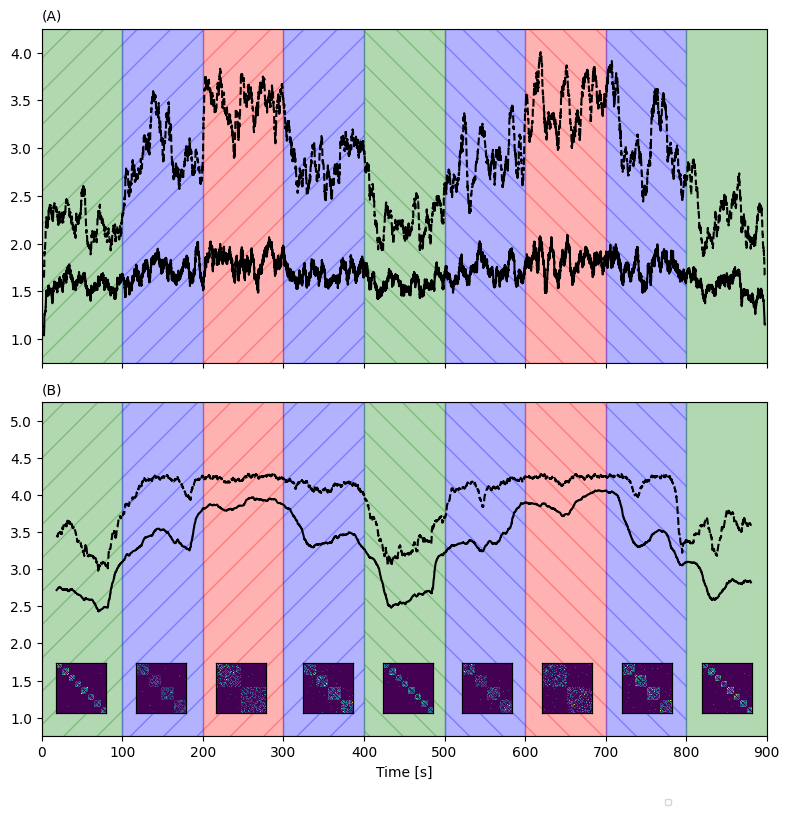

In [30]:
#Plot 5
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]
        ax[indices_plot[j]].plot(net.times[(window // 2)+1 : - (window // 2)], S[1:], color= 'black', linestyle = list_styles[i])
        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="/")
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

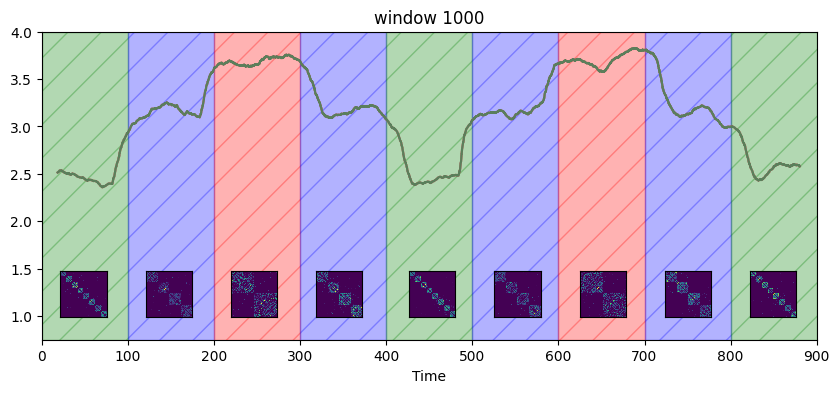

In [9]:
lamda = selected_lamdas[5]
plt.figure(figsize=(10,4))
fig = plt.axes()

window_S_selected = []
with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
    S_rate = pickle.load(f)
    window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

for i, lamda in enumerate(selected_lamdas):
    S = window_S_selected[0]
    fig.plot(net.times[(window // 2)+1 : - (window // 2)], S[1:], color = list_colors[i], alpha = 0.30)
    fig.set_xlabel('Time')
    fig.set_ylim(0.75, 4)
    fig.set_title(f'window {window }')

# Add inset plots for the matrices inside Plot A
matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
positions = [-0.03, 0.08, 0.19, 0.30, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
for i, (matrix, pos) in enumerate(zip(matrices, positions)):
    inset_ax = inset_axes(fig, width="15%", height="15%", loc="lower left", 
                        bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=fig.transAxes)
    inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    fig.fill_betweenx([0.75, 4*j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch='/')

fig.set_xlim(0, 900) 
    

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

#plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/primary_school/primary_school_windows.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

## Alternative Version

In [18]:
dict_hatch = {0: '-', 1: '/', 2: '.'}

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/1988629794.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


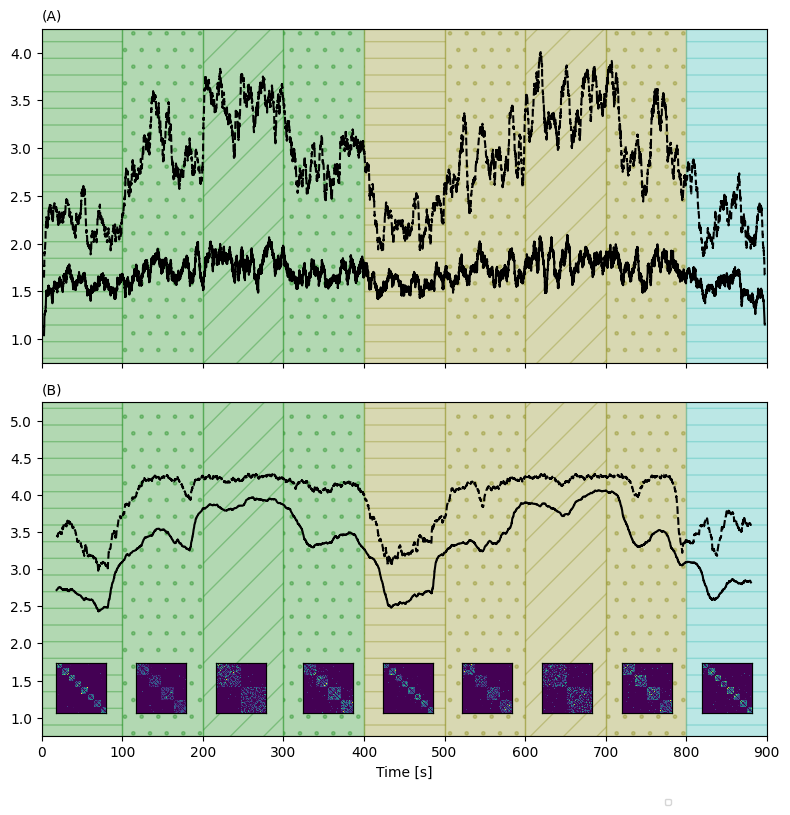

In [19]:
#Plot 5
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]
        ax[indices_plot[j]].plot(net.times[(window // 2)+1 : - (window // 2)], S[1:], color= 'black', linestyle = list_styles[i])
        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color= 'green', alpha=0.3, hatch=dict_hatch[list_scales[i] % 3])
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color= 'olive', alpha=0.3, hatch=dict_hatch[list_scales[i] % 3])
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color= 'lightseagreen', alpha=0.3, hatch=dict_hatch[list_scales[i] % 3])
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Far Talk

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/756659668.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


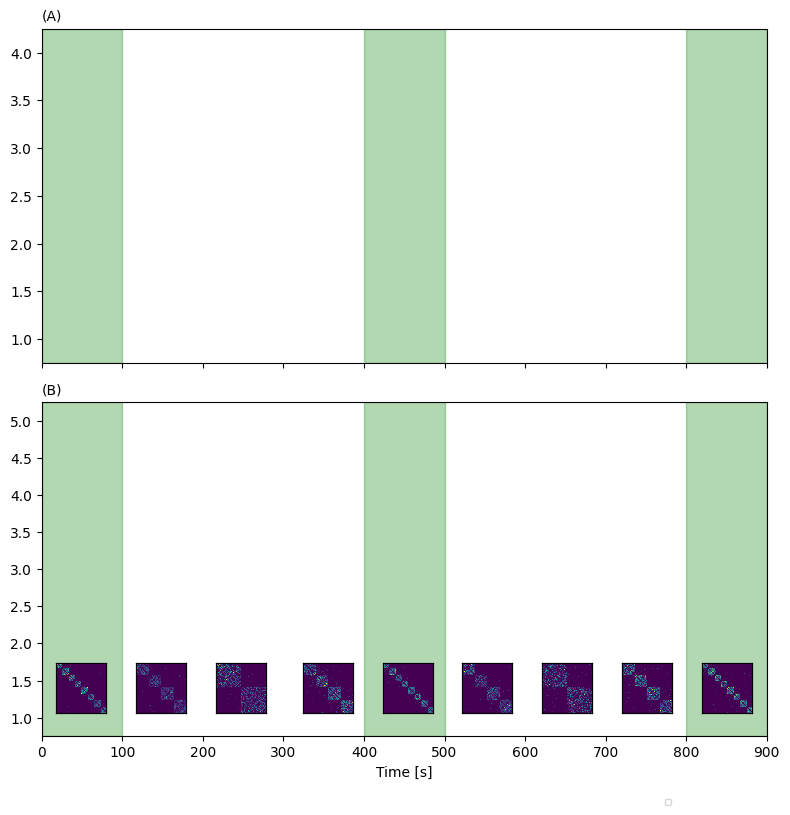

In [ ]:
#Plot 1
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]

        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(0, len(time_intervals),4):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows1.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/2877911444.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


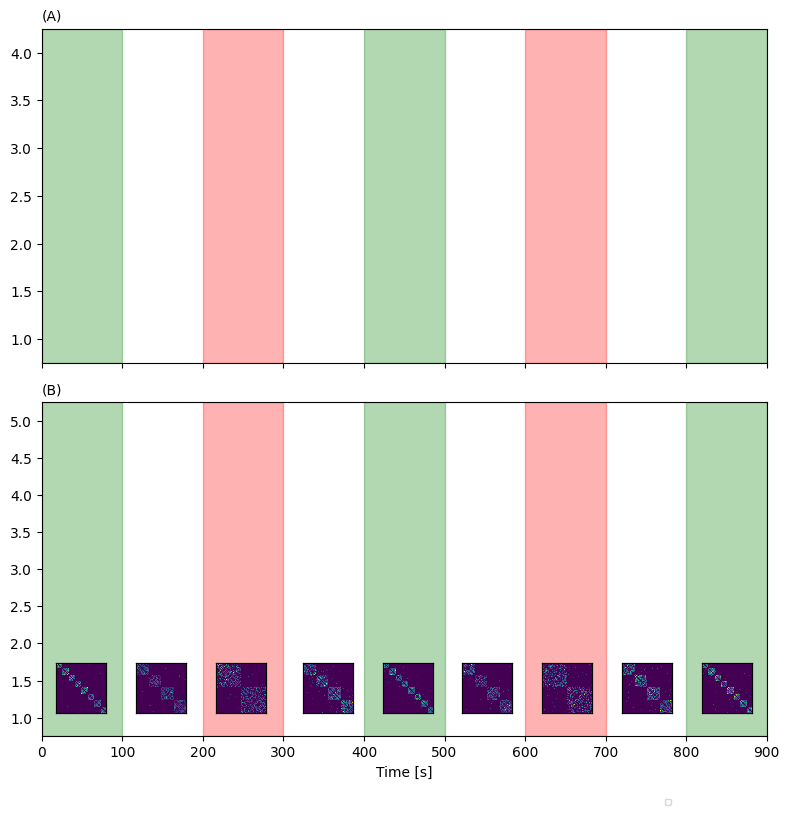

In [ ]:
#Plot 2
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]

        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(0, len(time_intervals),2):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows2.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/1983979806.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


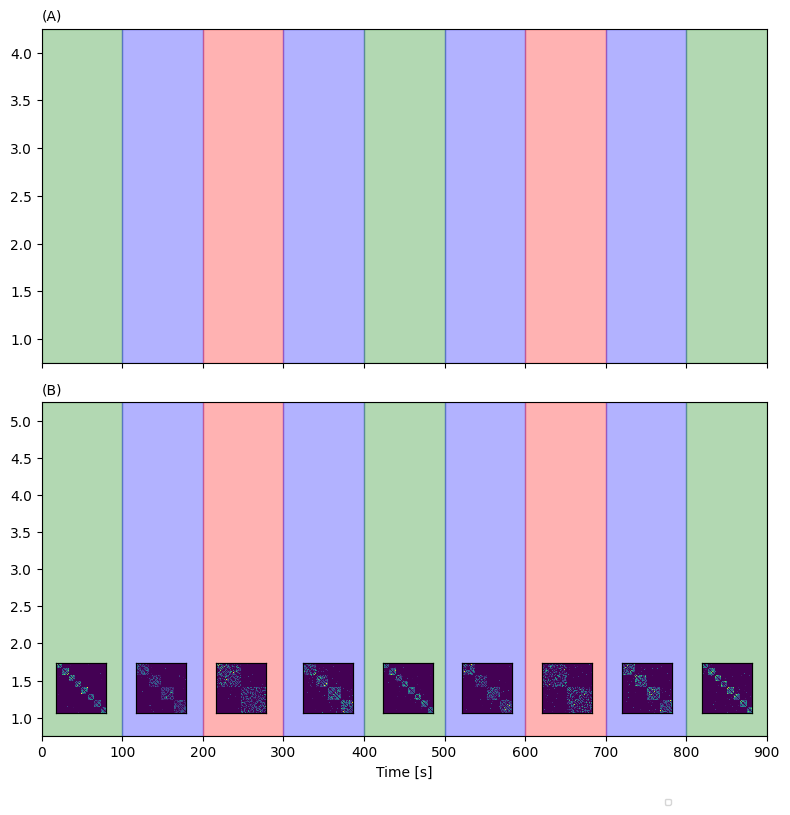

In [ ]:
#Plot 3
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]

        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows3.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/1730604219.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


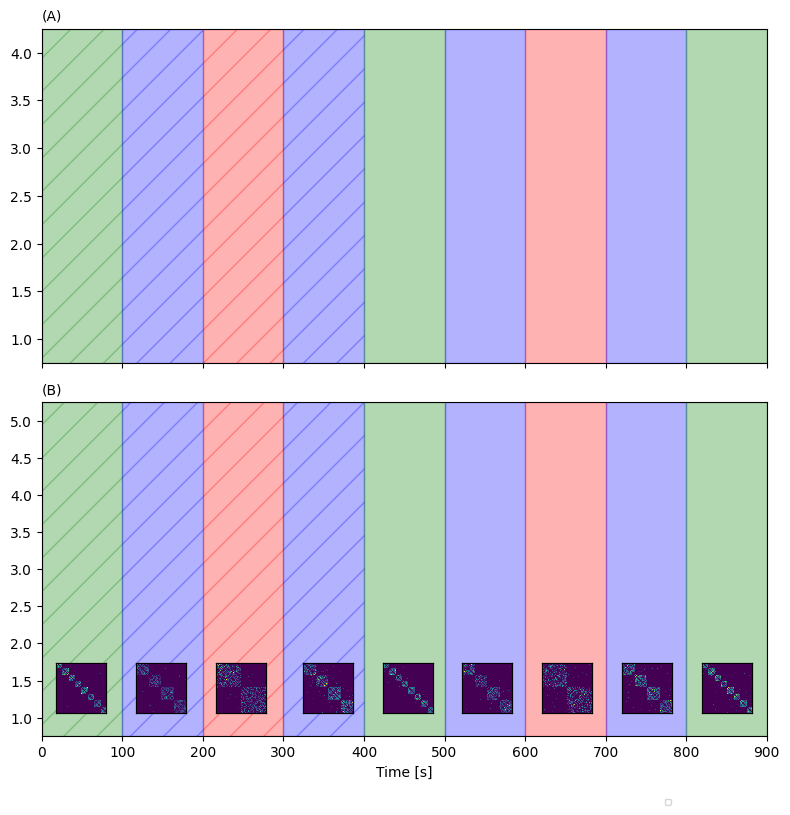

In [54]:
#Plot 4
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]

        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="/")
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows4.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416


/tmp/ipykernel_1458617/2088473881.py:45: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")


lamda 10.00000


/tmp/ipykernel_1458617/2088473881.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


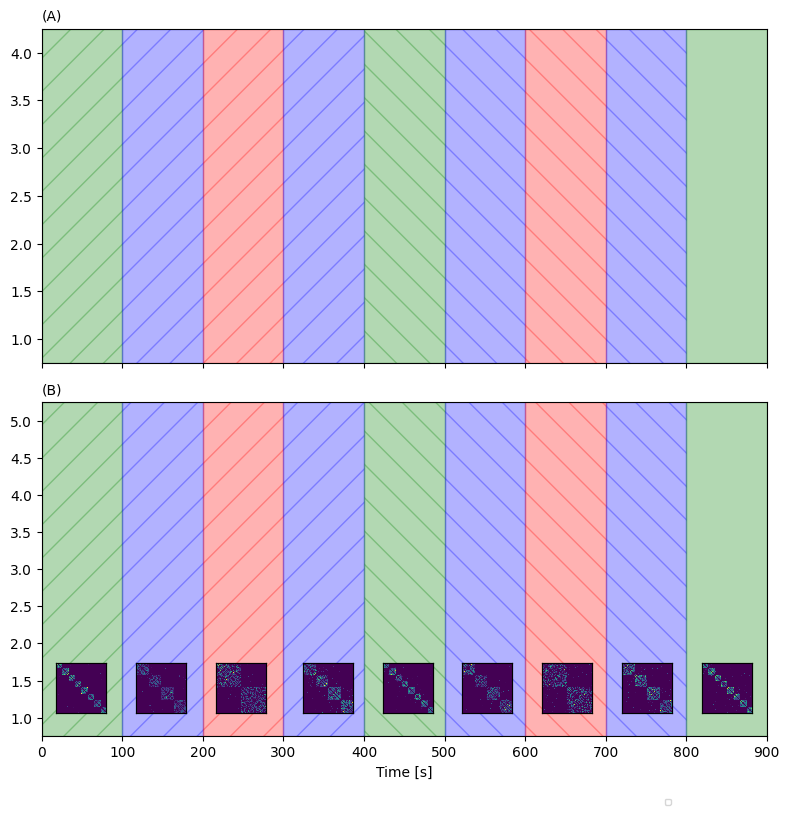

In [55]:
#Plot 5
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]

        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="/")
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows5.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/3138979575.py:46: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
/tmp/ipykernel_1458617/3138979575.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


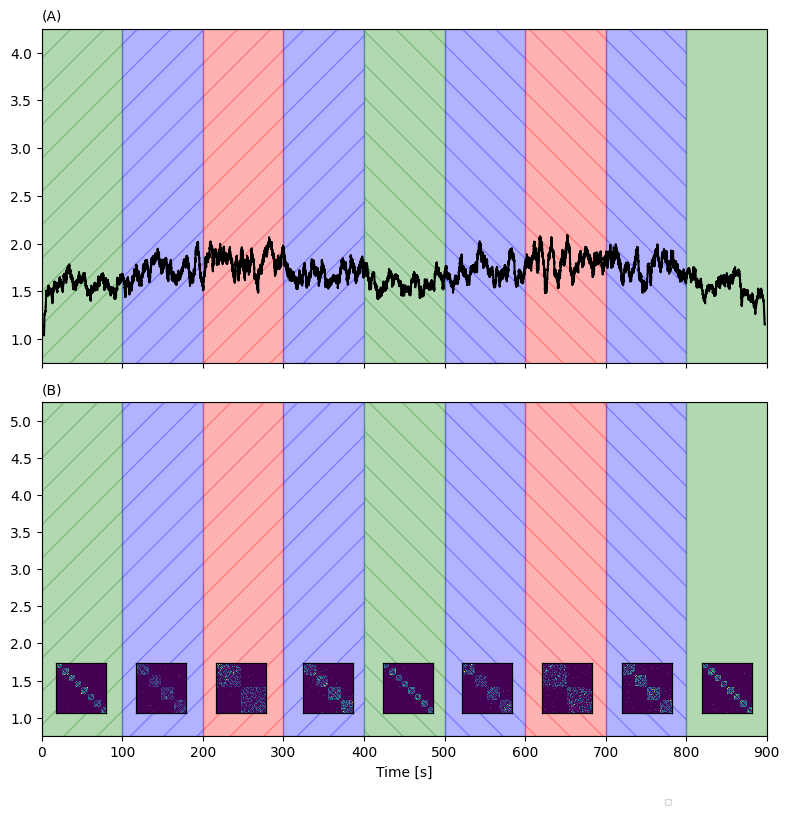

In [59]:
#Plot 6
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]
        if j == 0 and i != 1:
            ax[indices_plot[j]].plot(net.times[(window // 2)+1 : - (window // 2)], S[1:], color= 'black', linestyle = list_styles[i])
        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="/")
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows6.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/456224653.py:46: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
/tmp/ipykernel_1458617/456224653.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


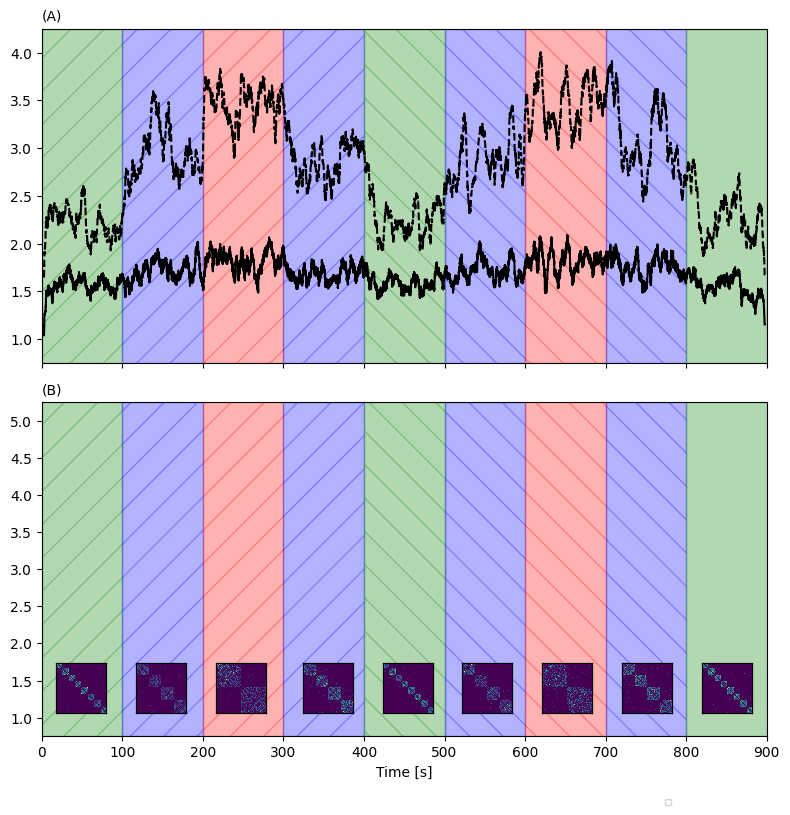

In [57]:
#Plot 7
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]
        if j == 0:
            ax[indices_plot[j]].plot(net.times[(window // 2)+1 : - (window // 2)], S[1:], color= 'black', linestyle = list_styles[i])
        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="/")
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows7.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

window 100
lamda 0.46416
lamda 10.00000
window 1000
lamda 0.46416
lamda 10.00000


/tmp/ipykernel_1458617/3792116915.py:46: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
/tmp/ipykernel_1458617/3792116915.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # otherwise the right y-label is slightly clipped


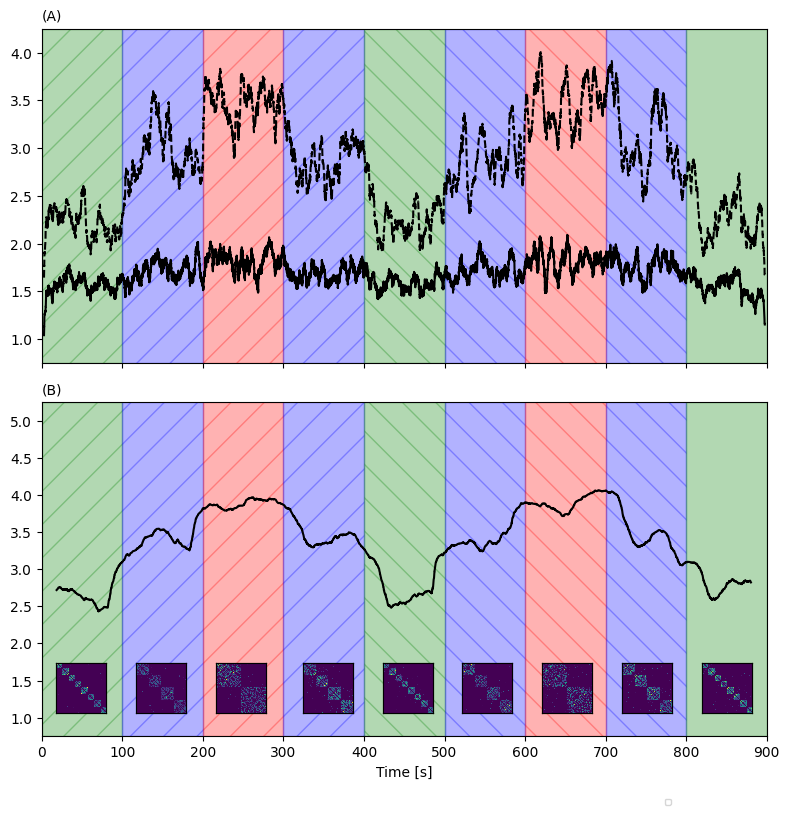

In [ ]:
#Plot 8
indices_plot = [0,1]

lamdas = [selected_lamdas[6]]
lamdas.append(selected_lamdas[9])
list_styles = ['solid', 'dashed']
list_titles = ['(A)', '(B)']

fig, ax = plt.subplots(2,1, figsize = (8, 8), sharex=True)
for j, window in enumerate(windows[1:]):
    print(f'window {window }')

    ax[indices_plot[j]].set_title(list_titles[j], loc='left', fontsize=10)
    
    window_S_selected = []
    for i, lamda in enumerate(lamdas):
        with open(f'//scratch/tmp/180/skoove/periodic_SBM_heat/window_S_selected/{window}/window_S{lamda:.11f}', 'rb') as f:
            S_rate = pickle.load(f)
            window_S_selected.append(S_rate['window_S'][f'{lamda:.11f}'])

    for i, lamda in enumerate(lamdas):
        S = window_S_selected[i]
        if j == 0 or i != 1:
            ax[indices_plot[j]].plot(net.times[(window // 2)+1 : - (window // 2)], S[1:], color= 'black', linestyle = list_styles[i])
        ax[indices_plot[j]].set_ylim(0.75, 4.25 + j)
        print(f'lamda {lamda:.5f}')

        # Add inset plots for the matrices inside Plot B
        if j == 1: 
            ax[indices_plot[j]].set_xlabel('Time [s]')
            matrices = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8, matrix9]
            positions = [-0.03, 0.08, 0.19, 0.31, 0.42, 0.53, 0.64, 0.75, 0.86]  # Horizontal positions for the insets
            for i, (matrix, pos) in enumerate(zip(matrices, positions)):
                inset_ax = inset_axes(ax[indices_plot[j]], width="15%", height="15%", loc="lower left", 
                                    bbox_to_anchor=(pos, 0.05, 1, 1), bbox_transform=ax[indices_plot[j]].transAxes)
                inset_ax.matshow(matrix, aspect='equal')  # Keep aspect ratio equal to preserve square shape
                inset_ax.set_xticks([])
                inset_ax.set_yticks([])
                #inset_ax.set_title(f"{time_intervals[i][0]} ≤ t < {time_intervals[i][1]}", fontsize=8, loc='center')

    #filling with colors
    for i in range(len(time_intervals)):
        if 0 <= i and i < 4:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="/")
        elif 4 <= i and i < 8:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3, hatch="\ ")
        else:
            ax[indices_plot[j]].fill_betweenx([0.75, 4.25 + j], time_intervals[i][0], time_intervals[i][1], color=dict_colors[list_scales[i]], alpha=0.3)
    
    ax[indices_plot[j]].set_xlim(0, 900) 
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize='xx-small', bbox_to_anchor=(0.85,0), ncol=5)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('/home/b/skoove/Desktop/periodic_SBM/periodic_SBM_windows8.png', format='png', dpi=300, bbox_inches='tight')
plt.show()